# Решение интеграллов

- https://github.com/stevengj/HCubature.jl
- https://github.com/stevengj/Cubature.jl
- https://github.com/giordano/Cuba.jl
- https://github.com/pabloferz/NIntegration.jl
- https://github.com/dextorious/NumericalIntegration.jl


## Метод Симпсона
```c++
D rho11 :: Sim(D y1, D b, int n, D a, int N)
{
    D st=(b-a)/N;
    D s1 = 0, s2 = 0;
    for(int i = 1; i < N; i+=2)
        {
        s1 += fun(a + i*st, y1, b, n);
        s2 += fun(a + (i+1)*st, y1, b, n);
        }
    D sum = st*(fun(a, y1, b, n)-fun(b, y1, b, n)+4*s1+2*s2)/3.0;

    return sum;
}

D rho11 :: Sims(D y1, D b, int n, D a, int N)
{
    D eps = 0.001*ps;
    D st=(b-a)/N;
    D x1 = a, x2 = b;
    D x=x1;
    D z1=0, z2=0;
    D s;
    do
        {
        z1=z2;
        s=(fun(x1, y1, b, n)-fun(x2, y1, b, n))/2.0;
        x=x1+st;
        while (x<x2)
            {
            s+=2*fun(x, y1, b, n) + fun(x+st, y1, b, n);
            x+=2*st;
            }
        z2=2*st*s/3.0;
        st/=2.0;
        } while (fabs(z1-z2)>eps);
    return z2;
}
```

In [6]:
using BenchmarkTools

In [1]:
function trapez(f, a, b, n)
    h = (b - a)/n
    result = 0.5*(f(a) + f(b))
    for i in 1:n-1
        result += f(a + i*h)
    end
    result *= h
end

trapez (generic function with 1 method)

In [83]:
function rectan(f, a, b, n)
    h = (b - a)/n
    result = f(a+0.5*h)
    for i in 1:n-1
        result += f(a + 0.5*h + i*h)
    end
    result *= h
end

rectan (generic function with 1 method)

# W

In [2]:
using Plots, LaTeXStrings

$$
W_2 = \frac{\Delta^2}{4}\sqrt{\frac{\pi}{b}}\int^t_0dt_1exp\left\{-\frac{Q_2(t_1)}{4b}\right\}
$$

$$
Q(t) = \Delta E - E_r + 2E_re^{-t/\tau_L}
$$
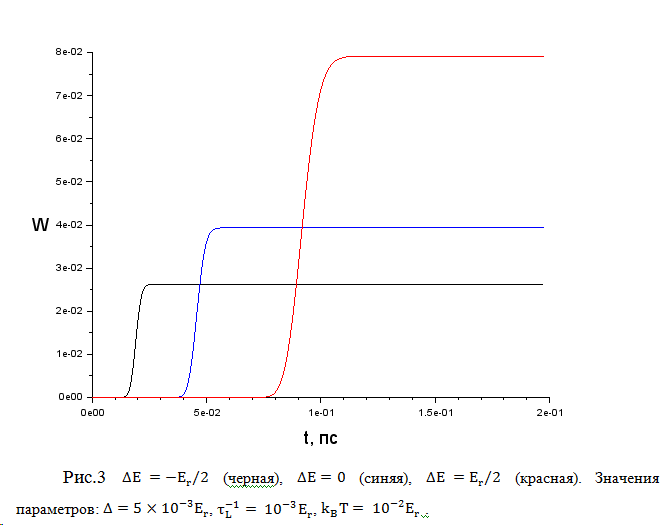

In [3]:
W2(t) = 0.25Δ^2 * sqrt(π/b) * trapez( t1->exp(-0.25Q(t1)^2/b) ,0, t, n+t*10 )

Q(t) = ΔE - Er + 2Er*exp(-t/τ)

Q (generic function with 1 method)

In [4]:
n = 100
Er = 1
ΔE = -0.5Er

kT = 0.01Er
b = Er*kT
Δ = 5e-3Er
τ = 1e3/Er
b*τ*τ

10000.0

In [14]:
t = collect(0:1e-2:2);
ΔE = -0.5Er
Wa = W2.(t*1512);

ΔE = 0.
Wb = W2.(t*1512);

ΔE = 0.5Er
Wc = W2.(t*1512);

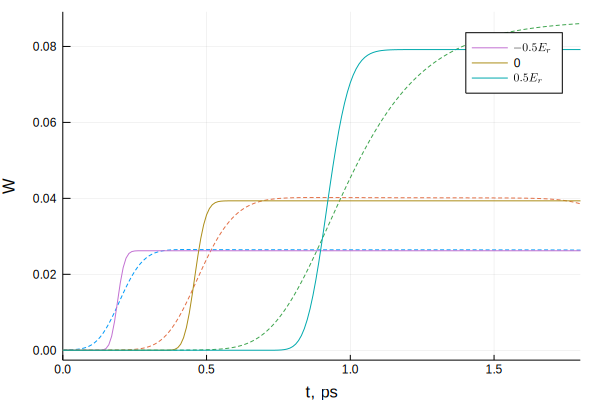

In [24]:
plot!(t,Wa, lab = "\$-0.5E_r\$")
plot!(t,Wb, lab = "0")
plot!(t,Wc, lab = "\$0.5E_r\$")

xaxis!("t, ps",(0, 1.8))
yaxis!("W")

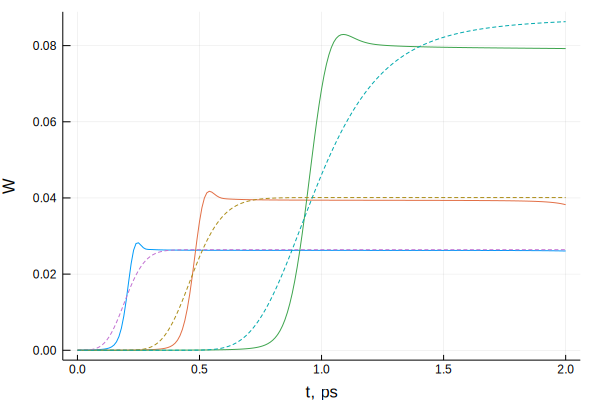

In [144]:
plot!(t,Wa, line = :dash, legend = false)
plot!(t,Wb, line = :dash, legend = false)
plot!(t,Wc, line = :dash, legend = false)

In [25]:
savefig("C:\\Users\\User\\Desktop\\диплом\\images\\W12d.png")

## Двойные

$$\int_2^3\int_0^2 (2x + y) dxdy$$

In [20]:
fun(x; y=0) = 2*x + y
# Out[3]: 9.000000000000005

fun (generic function with 1 method)

In [24]:
#=
Вычисляет значение двойного интеграла по формуле прямоугольников
при реализации двойной суммы
f - подынтегральная функция
a, b, c, d - границы прямоугольной области интегрирования
nx, ny - количество частичных отрезков по x и y соответственно
=#
function duorect(f, a, b, c, d, nx, ny)
    hx = (b - a)/nx
    hy = (d - c)/ny
    I = 0
    for i in 0:nx-1, j in 0:ny-1
        xi = a + 0.5hx + i*hx
        yj = c + 0.5hy + j*hy
        
        I += hx*hy*f(xi,y=yj)
    end
    I
end

duorect (generic function with 1 method)

In [70]:
function duorect2(f, a, b, c, d, nx, ny)
    g(y) = rectan( (x; y=y) -> 2*x + y, a, b, nx)
    return rectan(g, c, d, ny)
end

duorect2 (generic function with 1 method)

In [28]:
duorect(fun, 0, 2, 2, 3, 5, 5)

9.000000000000005

In [71]:
duorect2(fun, 0, 2, 2, 3, 5, 5)

9.0

# W2

In [2]:
function rectan(f, a, b, n)
    h = (b - a)/n
    result = f(a+0.5*h, b)
    for i in 1:n-1
        result += f(a + 0.5*h + i*h, b)
    end
    result *= h
end

rectan (generic function with 1 method)

In [6]:
function duorect(f,a, t, nx, ny)
    
    hx = t/nx
    
    In = 0
    for i in 0:nx-1
        xi = 0.5hx + i*hx
        hy = xi/ny
        for j in 0:ny-1
        
            yj = 0.5hy + j*hy

            In += hx*hy*f(xi,yj)
        end
    end
    In
end

duorect (generic function with 1 method)

In [5]:
I(t1, t2) = exp(im*ΔE*(t1-t2) + im*Er*τ*( -1+exp(-(t1-t2)/τ)+2( exp(-t2/τ)-exp(-t1/τ) ) ) - F(t1-t2) )
It(t1, t2) = exp(im*ΔE*(t1-t2) + im*Er*τ*( (t1-t2)/τ ) - F(t1-t2) )
F(t1mt2) = b*t1mt2^2

Wduo(t) = 0.25Δ^2 * real(duorect(I,0, t, 100, 100 ))
Wrec(t) = 0.25Δ^2 * real( rectan( (t1,t2)->rectan(I, 0, t1, 100), 0, t, 100) )

Wrec (generic function with 1 method)

$$
W_2(t) = \frac{\Delta^2}{4}Re\int^t_0 dt_1 \int^{t_1}_0 dt_2 exp\{\mathrm{i}\Delta E(t_1-t_2) + 
$$
$$
+ \mathrm{i}E_r\tau_L\left[\left( 1-e^{-\frac{\mathrm{i}(t_1-t_2)}{\tau_L}} \right) + 2\left(e^{-\frac{t_2}{\tau_L}} -  e^{-\frac{t_1}{\tau_L}}\right)\right] - F(t_1 - t_2)
$$
где
$$
F(t_1 - t_2) = \frac{1}{\pi}\int_0^\infty\frac{J(\omega)}{\omega^2}coth\frac{\beta\omega}{2} (1 - cos\omega(t_1 - t_2))d\omega
$$


In [7]:
function fastrect(f, I₀, t₀, t, nx, ny)
    
    dt₁ = (t-t₀)/nx
    
    In = I₀
    for i in 0:nx-1
        t₁ = t₀ + 0.5dt₁ + i*dt₁
        dt₂ = t₁/ny
        for j in 0:ny-1
        
            t₂ = 0.5dt₂ + j*dt₂

            In += dt₁*dt₂*f(t₁,t₂)
        end
    end
    In
end

fastrect (generic function with 1 method)

In [8]:
function duofast(t,n,m)
    Io = 0
    integ = []
    push!(integ, 0)
    for i in 2:length(t)
        Io = fastrect(I, Io, t[i-1], t[i], n, m)
        push!(integ, Io)
    end
    0.25Δ^2 * real.(integ)
end

duofast (generic function with 1 method)

In [19]:
Er = 1
kT = 0.01Er
b = Er*kT
Δ = 5e-3Er
ΔE = -0.5Er
τ = 1e3/Er

1000.0

In [20]:
t = collect(0:1e-2:2);
ΔE = -0.5Er
Wf11 = duofast(t*1512,800,800);

ΔE = 0
Wf22 = duofast(t*1512,500,500);

ΔE = 0.5Er
Wf33 = duofast(t*1512,400,400);

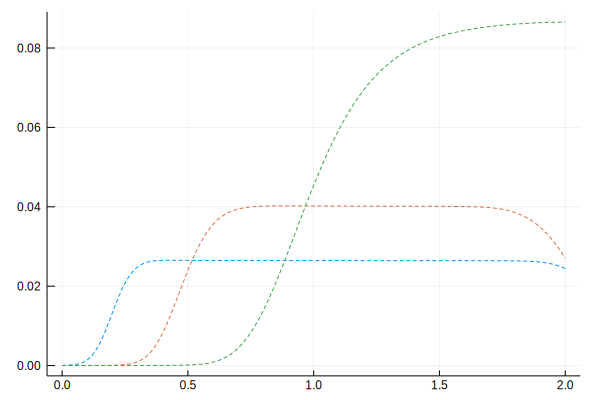

In [23]:
plot(t,2Wf11, line = :dash, lab = "")
plot!(t,2Wf22, line = :dash, lab = "")
plot!(t,2Wf33, line = :dash, lab = "")

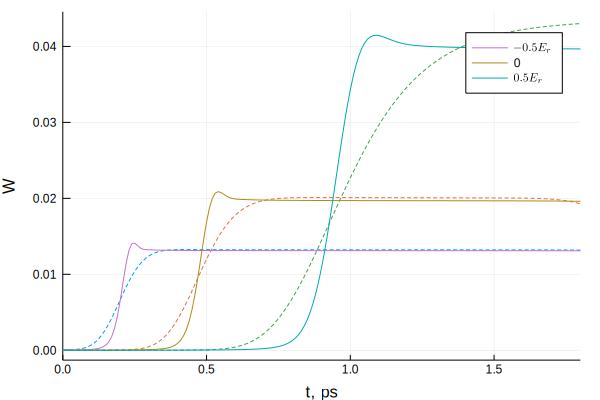

In [22]:
plot!(t,Wf11, lab = "\$-0.5E_r\$")
plot!(t,Wf22, lab = "0")
plot!(t,Wf33, lab = "\$0.5E_r\$")
xaxis!("t, ps",(0, 1.8))
yaxis!("W")

In [23]:
savefig("C:\\Users\\User\\Desktop\\диплом\\images\\W2d.png")

    Status `C:\Users\User\.julia\environments\v1.1\Project.toml`
  [6e4b80f9] BenchmarkTools v0.4.2
  [8f4d0f93] Conda v1.1.1
  [8a292aeb] Cuba v1.0.0
  [19dc6840] HCubature v1.3.0
  [7073ff75] IJulia v1.15.2
  [b964fa9f] LaTeXStrings v1.0.3
  [ee78f7c6] Makie v0.9.1
  [47be7bcc] ORCA v0.2.0
  [58dd65bb] Plotly v0.2.0
  [f0f68f2c] PlotlyJS v0.12.3
  [91a5bcdd] Plots v0.22.5
  [438e738f] PyCall v1.18.5
  [d330b81b] PyPlot v2.7.0
